# Exercise 1

The goal of this exercise is to estimate the 3D rotation of an object from a 2D image using a learning-based global descriptor. The idea is based on on:

```
M Sundermeyer, ZC Marton, M Durner, M Brucker, R Triebel
"Implicit 3d orientation learning for 6d object detection from rgb images"
European Conference on Computer Vision. Springer International Publishing, 2018.
https://arxiv.org/abs/1902.01275
```

Read the paper and try to understand the presented concepts. Under the assumption that we have already detected the object in 2D, we intend to estimate the 3D rotation by finding the most similar image in a set of reference images. We achieve this by conducting a nearest neighbor search in feature space using the cosine-similarity as distance metric. 

<img src="data/nn_search.png">


## Task 1

<img src="data/architecture.png">

Build the given network architecture with Pytorch. Train the network using the ADAM optimizer with the given training images by employing the MSE (mean squared error) loss. We already provide you with a corresponding dataloader.

In [1]:
import torch
import os
import collections
from pathlib import Path

import torch.nn as nn

# TODO: Replace all ... with the corresponding arguments. and
#       Implement the Encoder according to the description
class Encoder(nn.Module):
    def __init__(self, in_channel, latent_size, img_dims):
        super().__init__()
        

# TODO: Implement the Decode as in the description
class Decoder(nn.Module):
    def __init__(self, ...):
        super().__init__()
    
class AAE(nn.Module):
    def __init__(self, ...):
        super().__init__()
        c = img_shape[0]
        shape = img_shape[1::]
        
        # TODO: Instantiate the Encoder and Decoder
        self.encoder = Encoder()
        self.decoder = Decoder()        
    
    def encode(self, x):
        return self.encoder(x)
        
    def decode(self, x):
        return self.decoder(x)
        
    def forward(self, x):
        return self.decode(self.encode(x))
    
    def postprocess(self, img):
        img = img * 255.0
        img = img.permute(0, 2, 3, 1)
        return img.int()
    
def GetLossFunction():
    return  torch.nn.MSELoss()

In [2]:
from src.dataloader import Dataset
from torch.utils.data import DataLoader
import numpy as np
import os

# for reading files
def get_file_in_folder(path):
    files =[]
    for (dirpath, dirnames, filenames) in os.walk(path):
        for filename in filenames:
            files.append(os.path.join(path, filename))
        break   
    return files

# seeding
seed=10
np.random.seed(seed)

# path to training images
dataset_path = 'data/Ex7/images'

# create dataset
dataset = Dataset(get_file_in_folder(os.path.join(dataset_path,"input")), 
                  get_file_in_folder(os.path.join(dataset_path, "gt")))


img_shape = (3, 64, 64)
latent_size = 64

# create model
model = AAE(...)
model.train()
loss_func = GetLossFunction()
if torch.cuda.is_available():
    model = model.cuda()
    
# optimizer
lr = 1e-4
opt = torch.optim.Adam(model.parameters(),lr=lr)

# create dataloader    
batchsize = 32
loader = DataLoader(
        dataset=dataset,
        batch_size=batchsize,
        num_workers=4,
        drop_last=True,
        shuffle=True,
)

iteration = 0
max_iterations = 10000
while iteration <= max_iterations:
    for sample in loader:
        
        x = sample['input']
        y = sample['gt']

        if torch.cuda.is_available():
            x = x.cuda()
            y = y.cuda()
        
        # TODO: Implement the usual training steps (e.g. reset gradients).
        # run the model 
        
        # compute loss
        
        # update weights
        opt.zero_grad()
        y_ = model(x)
        loss = loss_func(y_,y)
        loss.backward()
        opt.step()
        if iteration % 1000 == 0:
            print('\riter {}, loss {}'.format (iteration, loss.item()))
              
        iteration += 1
        
model.eval()
pass

iter 0, loss 0.2526249885559082
iter 1000, loss 0.013358965516090393
iter 2000, loss 0.007517165504395962
iter 3000, loss 0.006158052943646908
iter 4000, loss 0.004493341781198978
iter 5000, loss 0.004306418355554342
iter 6000, loss 0.00396003108471632
iter 7000, loss 0.004047272726893425
iter 8000, loss 0.0032591603230684996
iter 9000, loss 0.0031120050698518753
iter 10000, loss 0.0030412524938583374


## Task 2

Use the encoder part of the network to build up a codebook for all the reference images in ```images_ref```. In particular, take each image feed it to the encoder and save the descriptor it in a list.

In [3]:
import cv2
import open3d as o3d

# path to training images
dataset_ref_path = 'data/Ex7/images_ref'

# for reading files
def get_file_in_folder(path):
    files =[]
    for (dirpath, dirnames, filenames) in os.walk(path):
        for filename in filenames:
            files.append(os.path.join(path, filename))
        break   
    return files

ref_images = get_file_in_folder(dataset_ref_path)
print('num of ref images:', len(ref_images))

codebook = []
for image in ref_images:
    
    # preprocess image as in the data loader
    
    # compute the descriptor for each sample
    
    # add it to the codebook


num of ref images: 42


## Task 3

For each test image, compute the latent code and find the 3 closest descriptors and their indices from the codebook by using k-nearest neighbor approach. Show the paired query image and the reconstructed image from the corresponding code from the codebook.

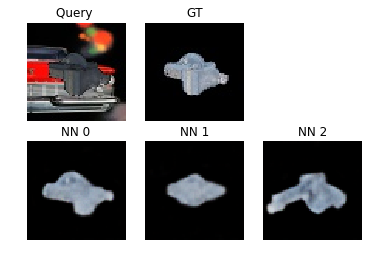

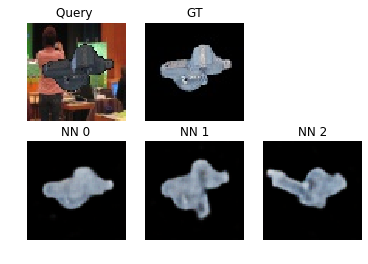

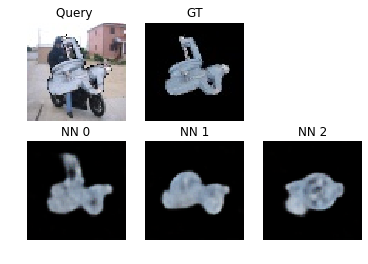

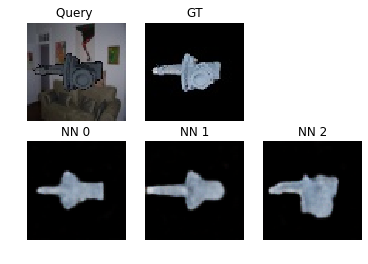

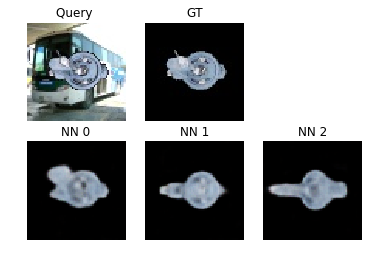

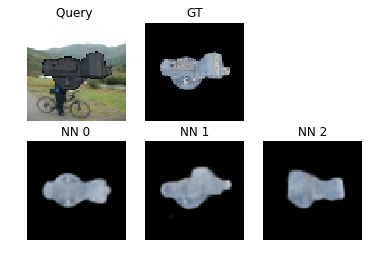

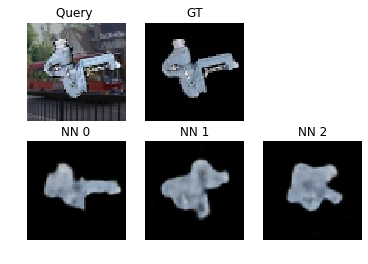

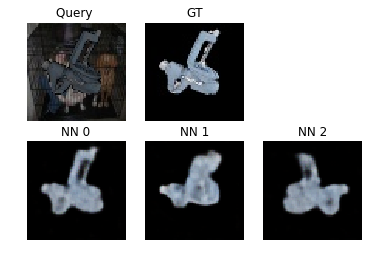

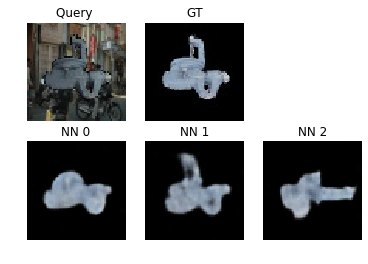

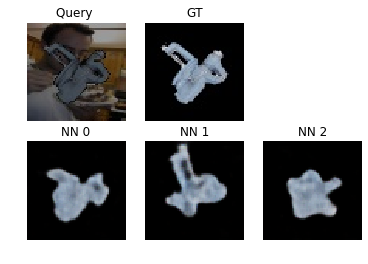

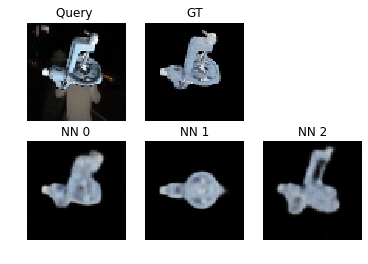

In [4]:
from matplotlib import pyplot as plt
%matplotlib inline

tree = o3d.geometry.KDTreeFlann(np.asarray(codebook).T)
num_neighbors = 3

iteration=0

# path to training images
dataset_path = 'data/Ex7/images_test'

# create dataset
dataset = Dataset(get_file_in_folder(os.path.join(dataset_path,"input")), 
                  get_file_in_folder(os.path.join(dataset_path, "gt")))

for i in range(len(dataset)):
    sample = dataset.load_item(i)
    
    if torch.cuda.is_available():
        x = sample['input'].unsqueeze(0)
        y = sample['gt'].unsqueeze(0)
        if torch.cuda.is_available():
            x= x.cuda()
            y= y.cuda()
    
    # compute descriptor for sample

    # find closet neighbors using knn
    
    # decode nearest neighbors and postprocess using model.postprocess
    
    # plot Query, GT and the nearest neighbors as shown on the top